TypeError: tz must be string or tzinfo subclass.

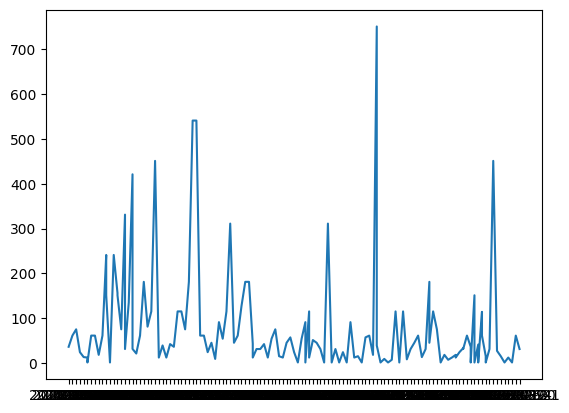

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing


# Read in the CSV file containing layoff data
df = pd.read_csv("webDev5.csv")

# Split the data into training and testing sets
train_size = int(len(df) * 0.8)
train_data, test_data = df[:train_size], df[train_size:]

# Define the Holt-Winters model and fit it to the training data
model = ExponentialSmoothing(train_data['Layoffs'], seasonal_periods=12, trend='add', seasonal='add')
model_fit = model.fit()

# Use the Holt-Winters model to predict the layoff numbers for the next 5 years
predictions = model_fit.forecast(60)

# Combine the historical and forecast data into a single DataFrame
dates = pd.date_range(start=df['Date'].iloc[0], periods=len(df) + len(predictions), freq='M')
forecast_df = pd.DataFrame({'Date': dates, 'Layoffs': np.concatenate([df['Layoffs'].values, predictions])})

# Plot the historical and forecast data on a graph
plt.plot(df['Date'], df['Layoffs'], label='Historical Data')
plt.plot(forecast_df['Date'], forecast_df['Layoffs'], label='Forecast')
plt.xlabel('Date')
plt.ylabel('Layoffs')
plt.legend()
plt.show()
